In [153]:
import pandas as pd
import numpy as np
import re
from helpers import *
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv(access_folder(folder_name='generated') + 'tweets_n_hashtags.csv', index_col = 0)

In [64]:
import ast
df.tweet_text = df.tweet_text.apply(ast.literal_eval)

In [75]:
df.columns = ['Topic', 'tweet_text']
df.head()

,Topic,tweet_text
33,News,"[john, carroll, university, get, gift]"
34,News,"[spring, cook, book, healthy, chocolate, bar]"
37,News,"[rocky, river, prepare, more, flooding, city, ..."
39,News,"[forecast, cooler, mid, week, cooler, isolated..."
40,News,"[brother, farook, decorate, veteran, killer]"


In [78]:
realHashes = pd.read_csv('hashtagsIndices.csv', index_col=0,  header=None)
realHashes.columns = ['Hashtags']
realHashes.head()

,Hashtags
0,
33,news
34,local
37,news
39,news
40,TopNews


In [81]:
df['hashtag'] = realHashes
df.head(20)

,Topic,tweet_text,hashtag
33,News,"[john, carroll, university, get, gift]",news
34,News,"[spring, cook, book, healthy, chocolate, bar]",local
37,News,"[rocky, river, prepare, more, flooding, city, ...",news
39,News,"[forecast, cooler, mid, week, cooler, isolated...",news
40,News,"[brother, farook, decorate, veteran, killer]",TopNews
42,News,"[arrest, connection, art, festival, theft, arr...",news
44,News,"[director, craven, die, scream, filmmaker, die...",news
45,Sports,"[secretariat, dominate, american, pharoah, bel...",sports
46,News,"[black, box, miss, german, airline, crash]",local
48,Sports,"[dale, earnhardt, get, engage, girlfriend, amy...",sports


#### build hashtag to topic table

In [95]:
hash2topic = {
    'news':'News',
    'local':'News',
    'isis':'News',
    'world':'News',
    'breaking':'News',
    'business':'News',
    'TopNews':'News',
    'Breaking':'News',
    'money':'News',
    'FukushimaAgain':'Fukushima',
    'Fukushima2015':'Fukushima',
    'FUKUSHIMA2015':'Fukushima',
    'fukushima2015':'Fukushima',
    'crime':'Crime',
    'PoliceBrutality':'Crime',
    'NRA':'Patriot',
    'USFA':'Patriot',
    'nra':'Patriot',
    'pjnet':'Patriot',
    'PJNET':'Patriot',
    'ArmyWomenProblems':'Patriot',
    '2A':'Patriot',
    'ISIS':'Anti-Islam',
    'IslamKills':'Anti-Islam',
    'StopIslam':'Anti-Islam',
    'Hillary':'Anti-Trump',
    'ThingsMoreTrustedThanHillary':'Anti-Trump',
    'NeverHillary':'Anti-Trump',
    'ARRESTObama':'Anti-Trump',
    'LockHerUp':'Anti-Trump',
    'ObamaWishlist':'Anti-Trump',
    'Obama':'Anti-Trump',
    'ObamaLameDuck':'Anti-Trump',
    'CrookedHillary':'Anti-Trump',
    'isis':'Foreign Countries',
    'Syria':'Foreign Countries',
    'Turkey':'Foreign Countries',
    'nukraine':'Foreign Countries',
    'Brussels':'Foreign Countries',
    'Russia':'Foreign Countries',
    'Iraq':'Foreign Countries',
    'entertainment':'Entertainment',
    'celebs':'Entertainment',
    'NowPlaying':'Entertainment',
    'Showbiz':'Entertainment',
    'RAP':'Entertainment',
    'life':'Entertainment',
    'Music':'Entertainment',
    'showbiz':'Entertainment',
    'MyEmmyNominationWouldBe':'Entertainment',
    'soundcloud':'Entertainment',
    'IHatePokemonGoBecause':'Entertainment',
    'iTunes':'Entertainment',
    'rap':'Entertainment',
    'BlackLivesMatter':'Black Support',
    'BlackTwitter':'Black Support',
    'blacklivesmatter':'Black Support',
    'BlackHistoryMonth':'Black Support',
    'BlackSkinIsNotACrime':'Black Support',
    'BLM':'Black Support',
    'BlackToLive':'Black Support',
    'blacktwitter':'Black Support',
    'blacktolive':'Black Support',
    'ICelebrateTrumpWith':'Trump Support',
    'MAGA':'Trump Support',
    'WakeUpAmerica':'Trump Support',
    'MakeAmericaGreatAgain':'Trump Support',
    'TrumpTrain':'Trump Support',
    'Trump2016':'Trump Support',
    'maga':'Trump Support',
    'tcot':'Trump Support',
    'TCOT':'Trump Support',
    'GOP':'Trump Support',
    'GOPDebate':'Trump Support',
    'ccot':'Trump Support',
    'AmericaFirst':'Trump Support',
    'TrumpForPresident':'Trump Support',
    'TrumpBecause':'Trump Support',
    'health':'Health',
    'environment':'Health',
    'sports':'Sports',
    'hockey':'Sports',
    'Hockey':'Sports',
    'baseball':'Sports',
    'Sports':'Sports',
    'MyOlympicSportWouldBe':'Sports',
}

In [83]:
hash2topicDF = pd.DataFrame(list(hash2topic.values()), list(hash2topic.keys()))

In [84]:
hash2topicDF.columns = ['category']
hash2topicDF.category.value_counts().sum()

80

In [96]:
df['NewCategories']=df.hashtag.apply(lambda x: hash2topic[x])

In [102]:
df = df.drop('NewCategories', axis=1)
df.head()

,Topic,tweet_text,hashtag
33,News,"[john, carroll, university, get, gift]",news
34,News,"[spring, cook, book, healthy, chocolate, bar]",local
37,News,"[rocky, river, prepare, more, flooding, city, ...",news
39,News,"[forecast, cooler, mid, week, cooler, isolated...",news
40,News,"[brother, farook, decorate, veteran, killer]",TopNews


In [103]:
df.to_csv('tweets_n_hashtags.csv')

In [104]:
df.shape

(738502, 3)

In [107]:
df.Topic.value_counts()/df.Topic.value_counts().sum()*100

News                 52.393223
Sports               14.760285
Entertainment         7.243447
Trump Support         7.065655
Black Support         3.563024
Fukushima             3.234927
Health                2.977379
Patriot               2.621658
Anti-Trump            2.012588
Crime                 1.478940
Anti-Islam            1.374945
Foreign Countries     1.273930
Name: Topic, dtype: float64

In [114]:
df.index.values

array([     33,      34,      37, ..., 2150849, 2150857, 2150867], dtype=int64)

In [117]:
len(df.index.values)

738502

In [131]:
test_indices = np.random.choice(df.index.values, size=round(len(df.index.values)*0.2), replace=False)

In [132]:
len(test_indices)

147700

In [133]:
np.unique(test_indices).shape

(147700,)

In [138]:
len(test_indices)/len(df.index.values)

0.19999945836301053

In [148]:
train_indices = np.delete(df.index.values, np.where(df.index.values == test_indices))

C:\Users\utente\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [149]:
len(train_indices)

738502

(array([ 181.,  139.,  152.,  139.,  155.,  127.,  159.,  157.,  165.,
         164.,  158.,  153.,  136.,  144.,  139.,  161.,  161.,  149.,
         142.,  153.,  157.,  160.,  131.,  185.,  156.,  149.,  160.,
         155.,  139.,  145.,  140.,  147.,  143.,  138.,  151.,  154.,
         174.,  162.,  175.,  133.,  107.,  150.,  165.,  139.,  138.,
         180.,  130.,  127.,  159.,  142.,  156.,  162.,  132.,  132.,
         158.,  130.,  157.,  165.,  120.,  161.,  135.,  110.,  133.,
         155.,  170.,  142.,  148.,  167.,  168.,  167.,  168.,  165.,
         163.,  158.,  139.,  132.,  148.,  171.,  169.,  169.,  132.,
         174.,  151.,  159.,  164.,  137.,  133.,  164.,  166.,  155.,
         135.,  145.,  141.,  157.,  134.,  161.,  168.,  194.,  179.,
         140.,  154.,  152.,  179.,  150.,  137.,  134.,  157.,  149.,
         165.,  159.,  178.,  144.,  151.,  155.,  134.,  150.,  142.,
         178.,  168.,  145.,  169.,  169.,  140.,  137.,  161.,  156.,
      

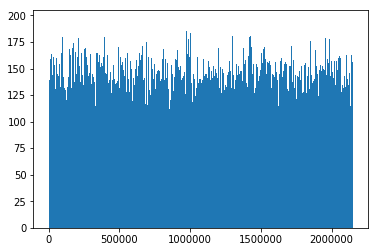

In [155]:
test_